Basic setups

In [1]:
#install.packages("paleobioDB")
library(devtools)
install_github('ropensci/paleobioDB')
library(paleobioDB)

from URL https://api.github.com/repos/ropensci/paleobioDB/zipball/master
Installing paleobioDB
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/c3/bzm4vh_91zdbl5wz5zt4wn200000gn/T/RtmprlANeG/devtoolsa0ba3a881c58/ropensci-paleobioDB-6d97e44'  \
  --library='/Library/Frameworks/R.framework/Versions/3.4/Resources/library'  \
  --install-tests 

Loading required package: raster
Loading required package: sp
Loading required package: maps


In [2]:
#library(paleobioDB)

Find the information of a specific collection record with an id.
It is also an example about getting familiar with the package.

In [3]:
pbdb_collection (id=1003, vocab="pbdb", show="loc")

collection_no record_type formation      lng       lat      llp
1 1003          collection  Cherokee Shale -94.80417 37.33111 MS 
  collection_name                n_occs early_interval reference_no cc state 
1 USGS 7848-Cherokee Co., Kansas 1      Desmoinesian   33           US Kansas
  county  
1 Cherokee

In [4]:
a<-pbdb_collection (id=1003, vocab="pbdb", show=c('loc'))

Put the dataframe in a global map

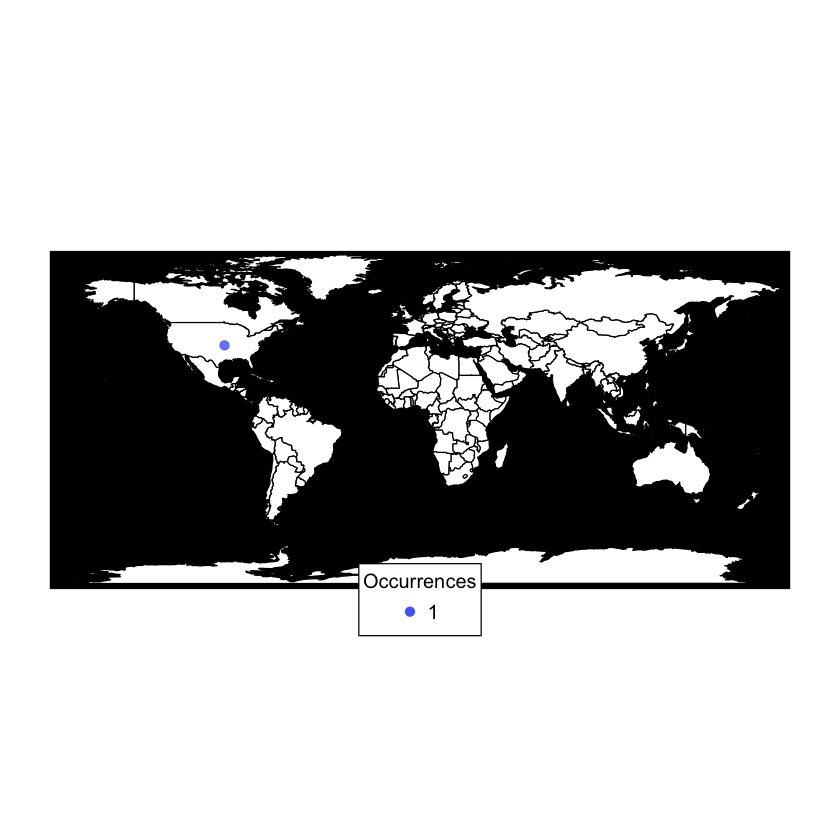

In [5]:
pbdb_map (a)

If we are using an older version of the pacakge, we are not able to run pbdb_occurences
So we have to download the API from the github with the most updated information.

In [6]:
#data<- pbdb_occurrences (limit=1000, vocab= 'pbdb', base_name='mammalia',show=c('phylo','coords','ident'))

In [7]:
#pbdb_ref_occurrences (vocab="pbdb", base_name="Canis", year=2000)

x is all the dinasour class or family

try and catch needs to be applied here. This is the link source of these names: https://en.wikipedia.org/wiki/Dinosaur_classification

In [8]:
x <- list('Abelisauridae', 'Noasauridae', 'Megalosauridae','Spinosauridae','Allosauridae',
           'Carcharodontosauridae','Neovenatoridae','Metriacanthosauridae','Coeluridae','Tyrannosauridae',
         'Ornithomimidae','Alvarezsauridae','Therizinosauridae','Troodontidae','Dromaeosauridae',
          'Aves','Thecodontosaurus','Plateosauridae','Riojasaurus','Massospondylidae',
          'Vulcanodontidae','Omeisauridae','Cetiosauridae','Diplodocidae','Camarasauridae',
          'Brachiosauridae','Euhelopodidae','Titanosauridae','Pisanosauridae','Fabrosauridae',
          'Scelidosauridae','Stegosauria','Nodosauridae','Ankylosauridae','Pachycephalosauria',
          'Psittacosauridae','Protoceratopsidae','Ceratopsidae','Heterodontosauridae','Hypsilophodontidae',
          'Iguanodontidae','Hadrosauridae'
         )


In [9]:
#y <-list('Massospondylidae',
#          'Vulcanodontidae','Omeisauridae','Cetiosauridae','Diplodocidae','Camarasauridae',
#          'Brachiosauridae','Euhelopodidae','Titanosauridae','Pisanosauridae','Fabrosauridae',
#          'Scelidosauridae','Stegosauria','Nodosauridae','Ankylosauridae','Pachycephalosauria',
#          'Psittacosauridae','Protoceratopsidae','Ceratopsidae','Heterodontosauridae','Hypsilophodontidae',
#          'Iguanodontidae','Hadrosauridae')

In [10]:
#for(i in y){
#    try(pbdb_map(pbdb_occurrences(
#        limit="all",base_name=i, vocab="pbdb",show=c("coords", "phylo", "ident")),
#             col.point=c("pink","red"), col.ocean="light blue",main = i))}


In the cell below, we are running the function that visualizes every species(so called) by pointing their occurences on the global map. A lot of run time required. Used try and catch because some species have little data and none value errors occured. Try and catch is often used in programming to (mostly) ignore errors and keep the loops or programs running.

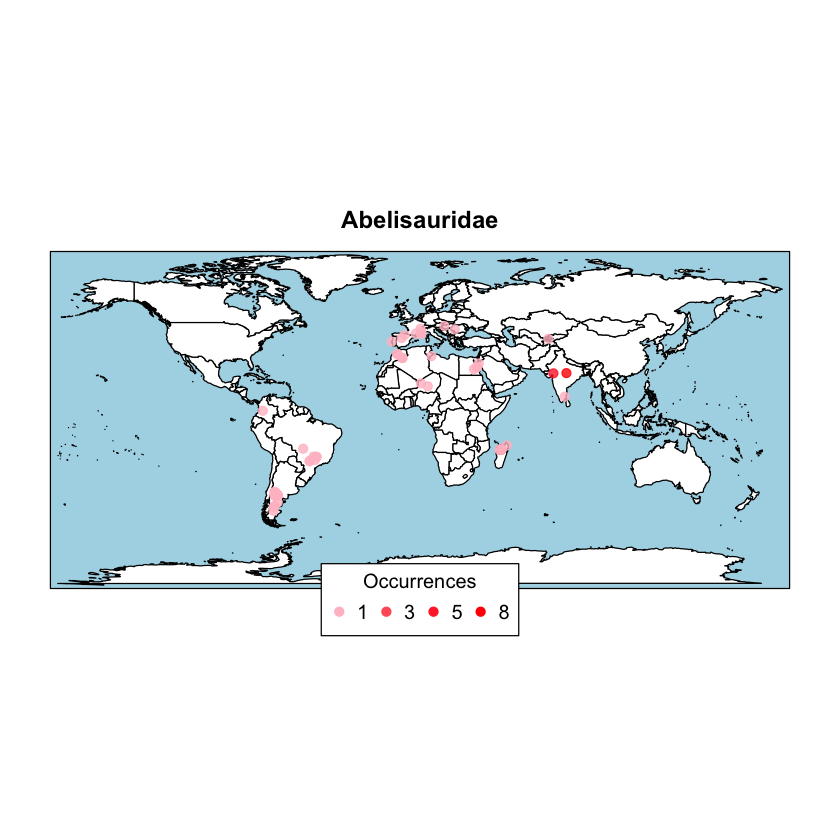

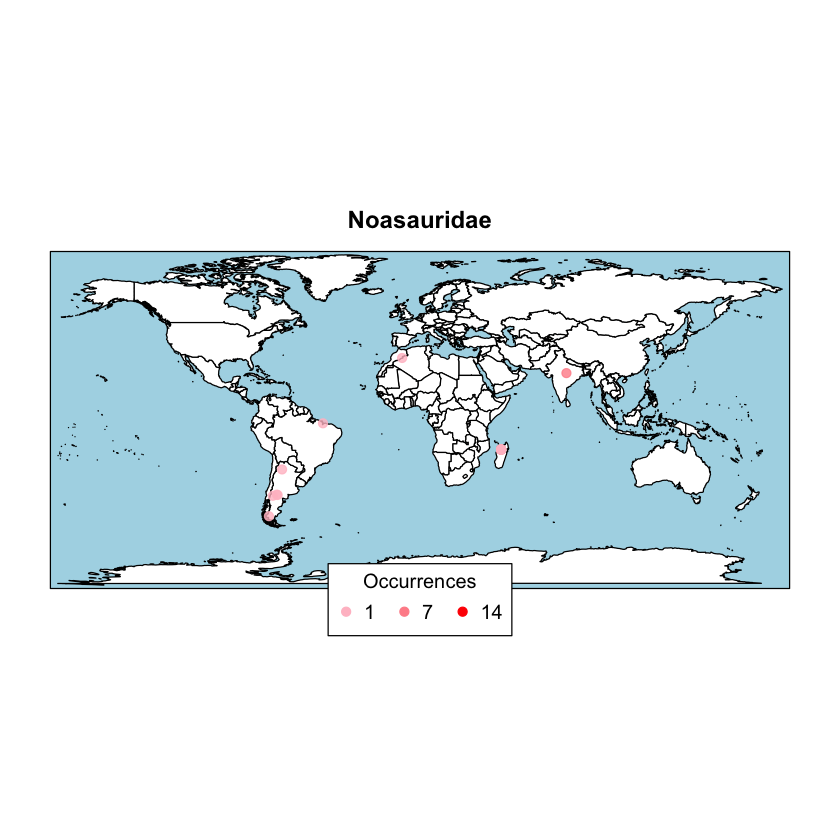

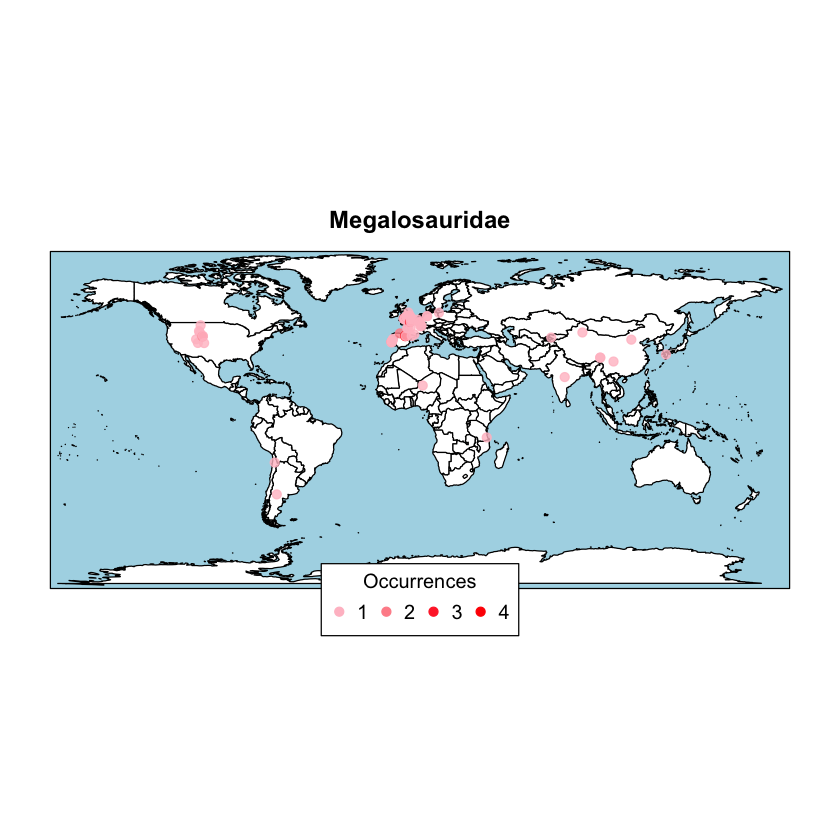

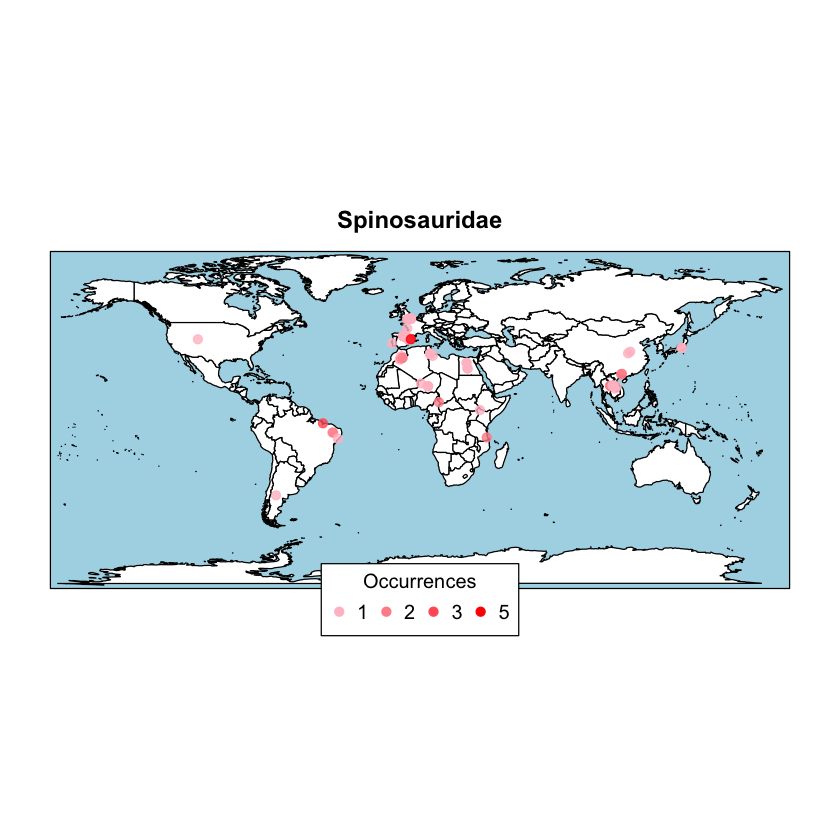

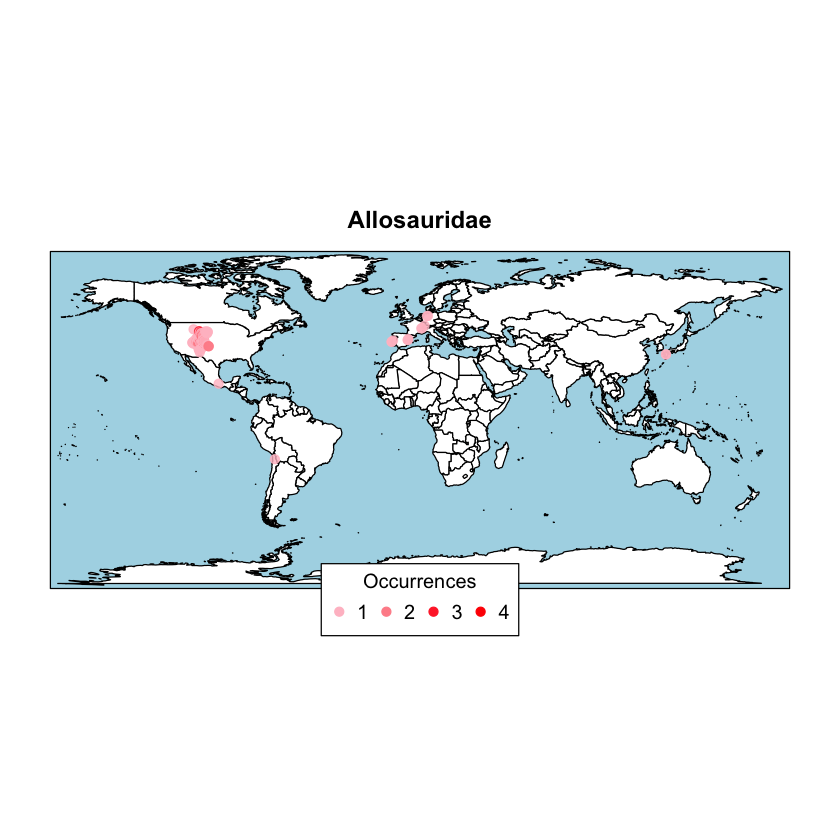

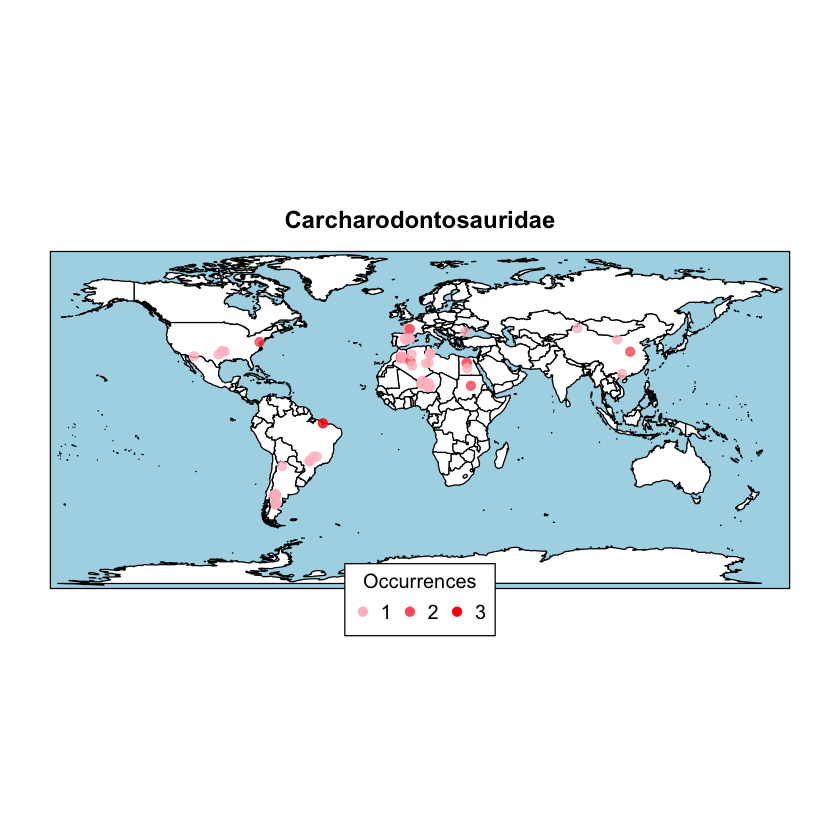

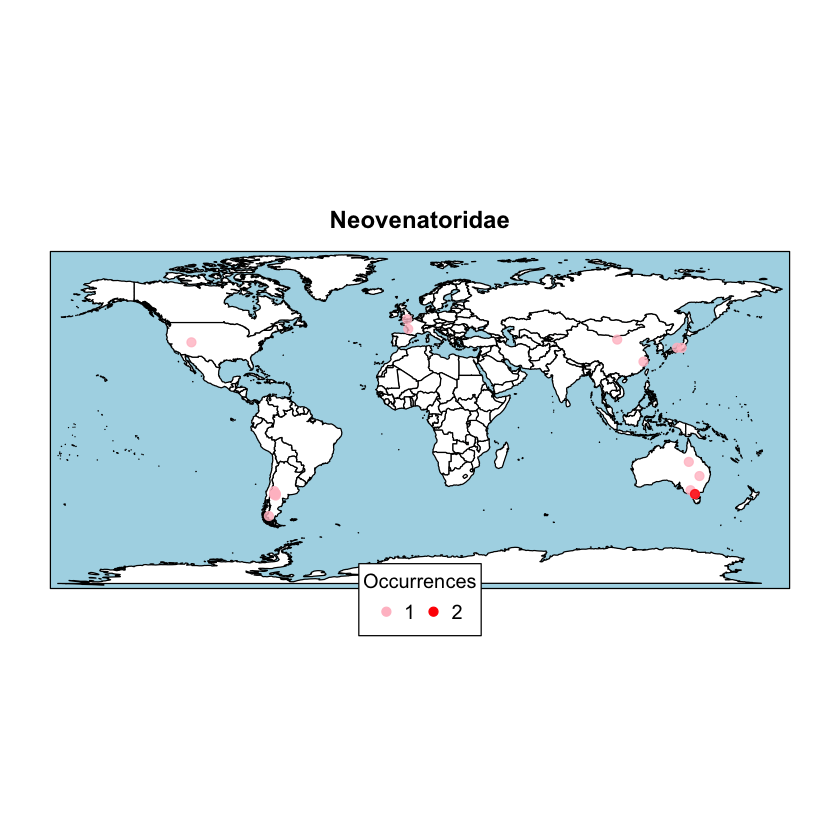

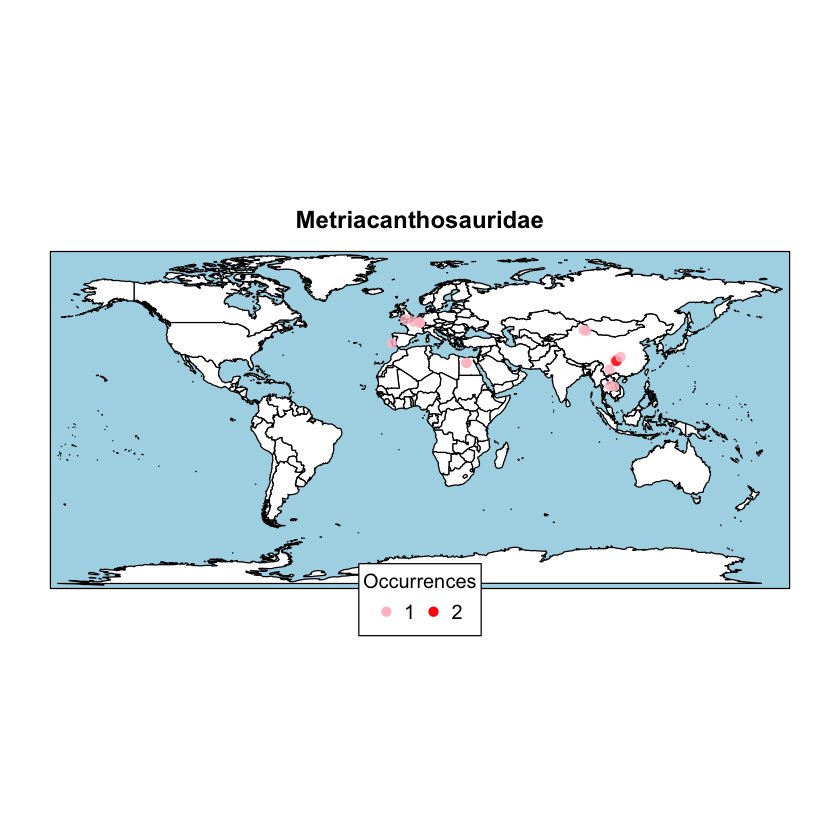

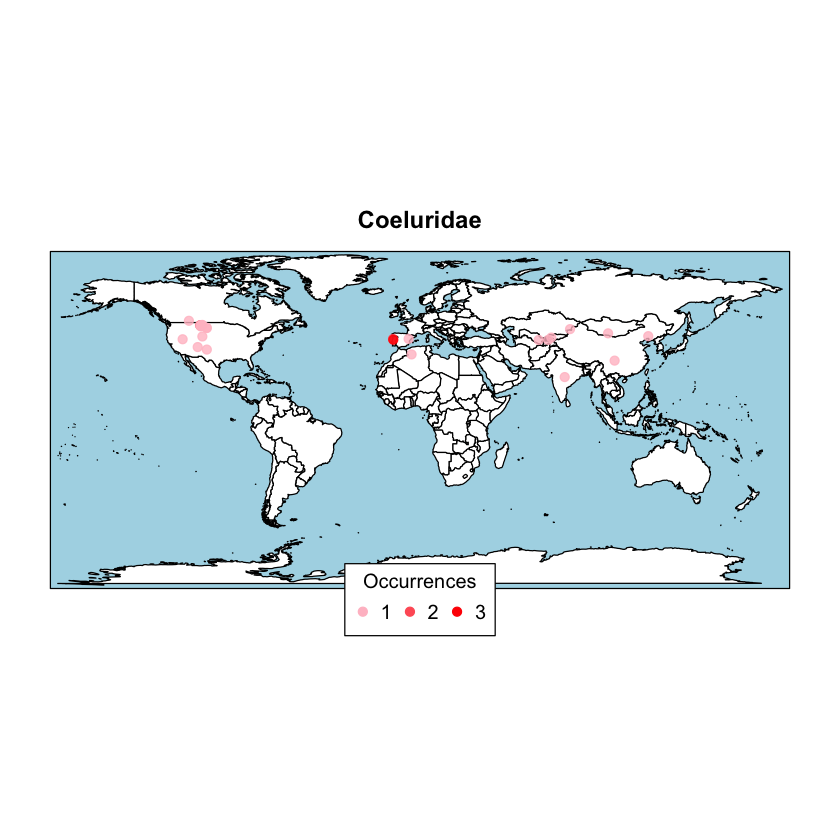

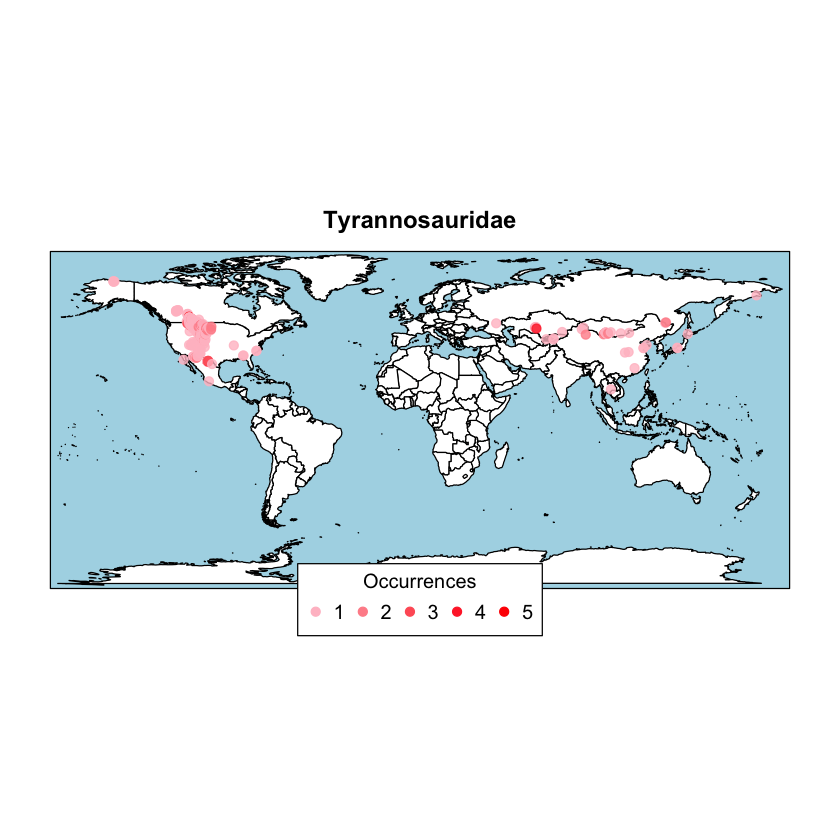

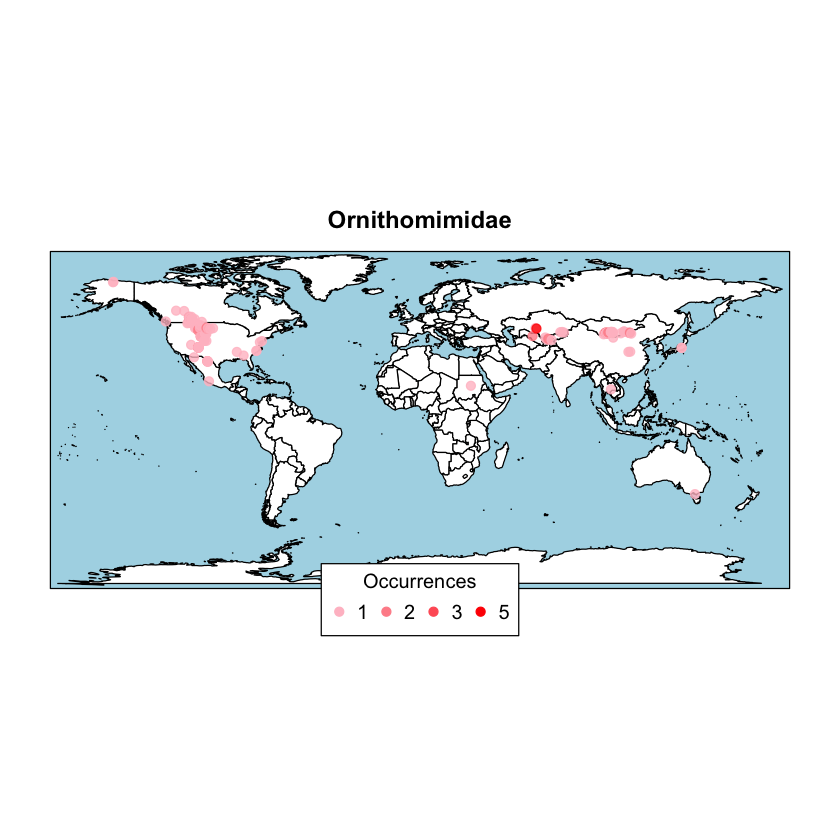

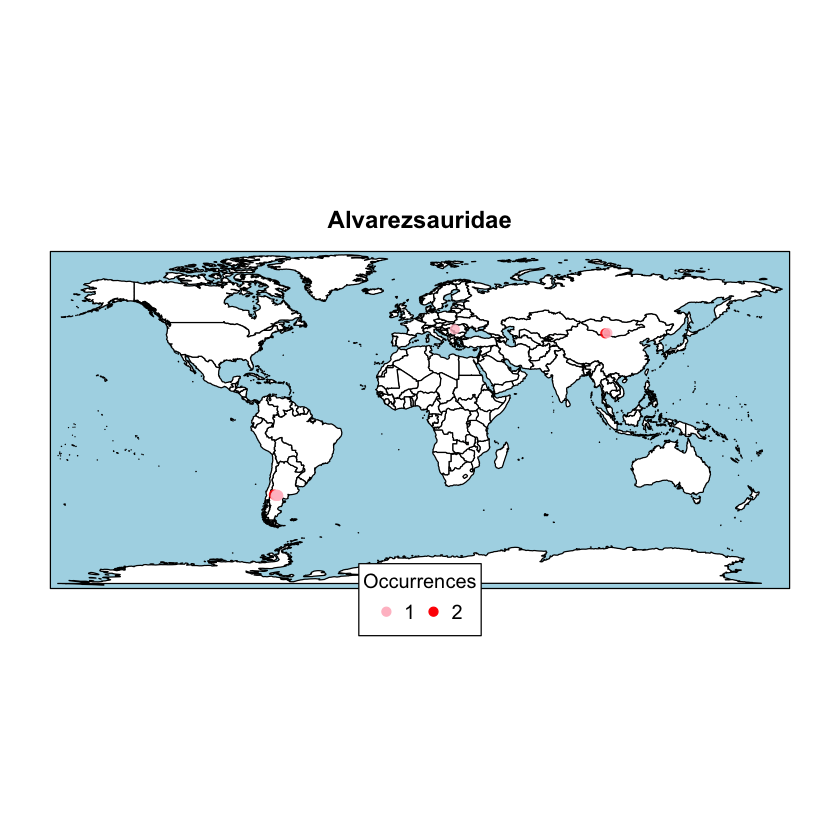

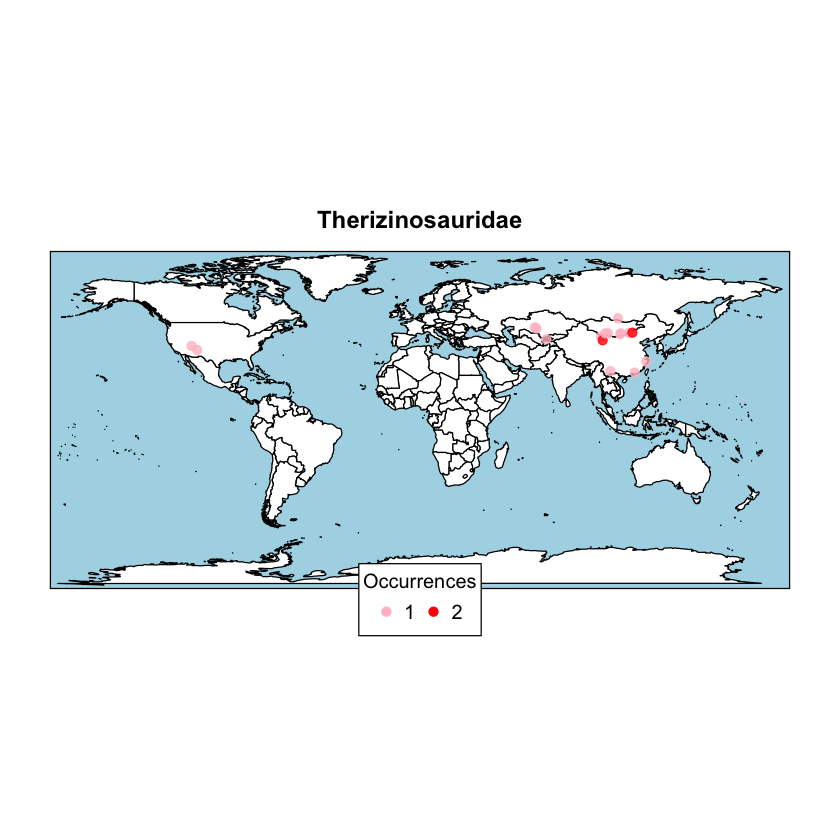

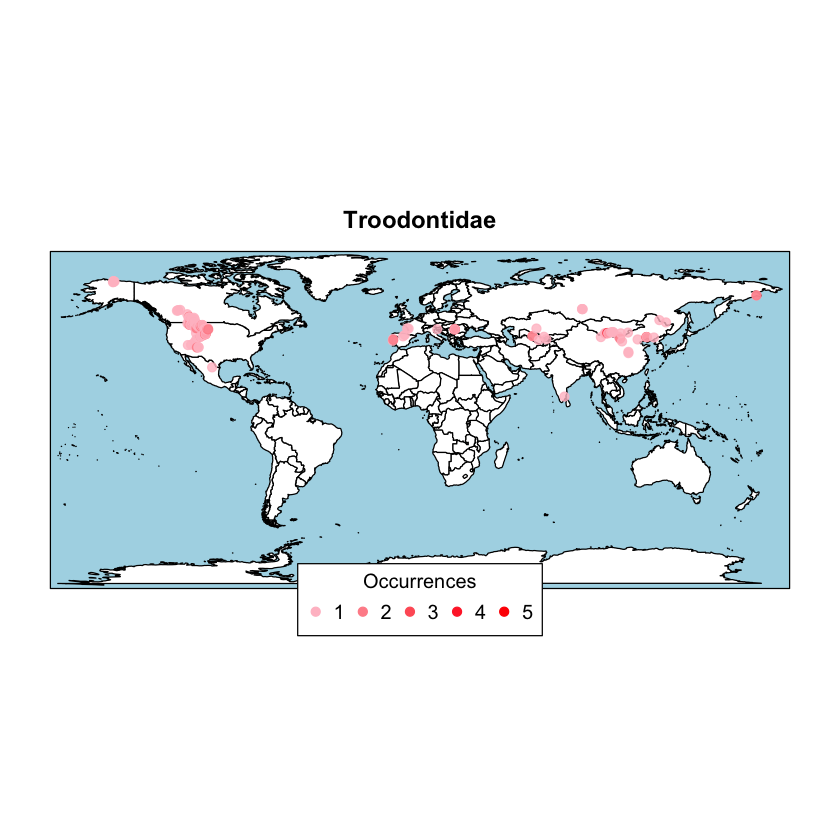

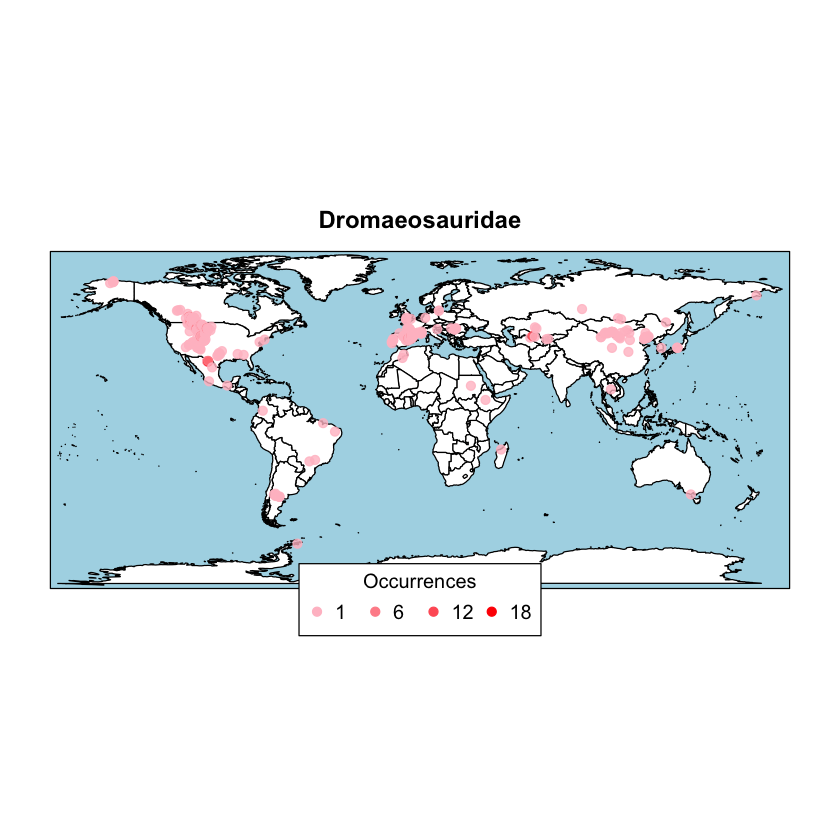

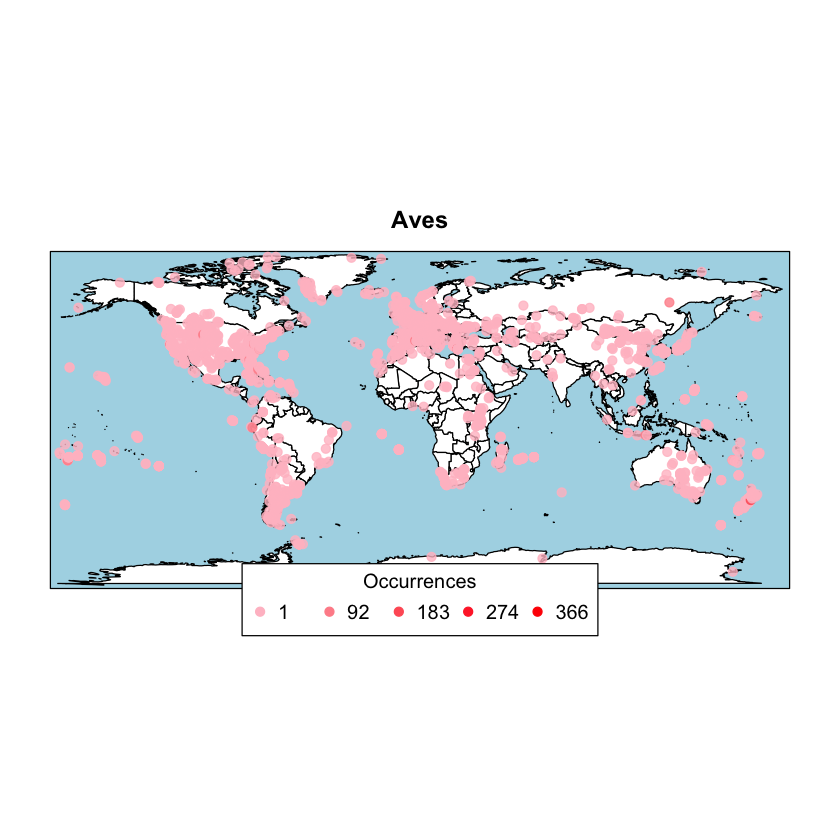

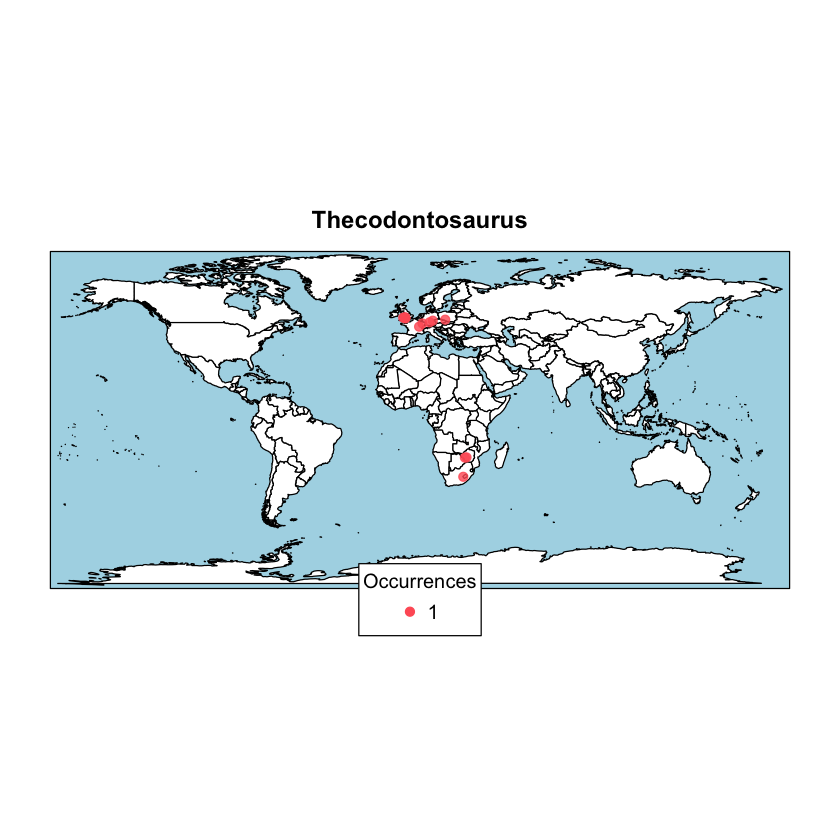

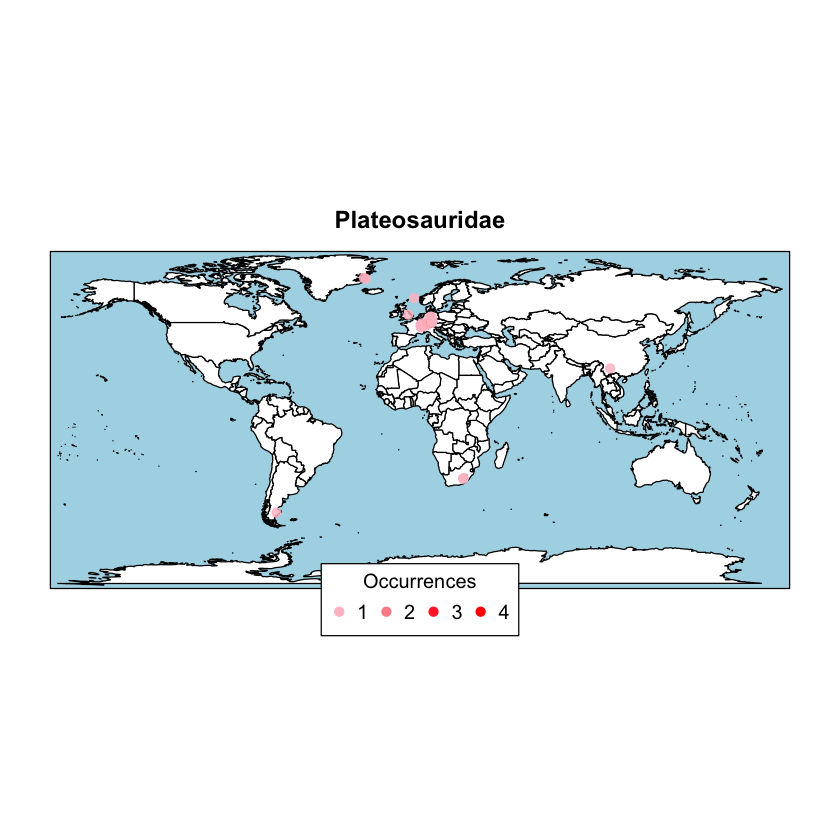

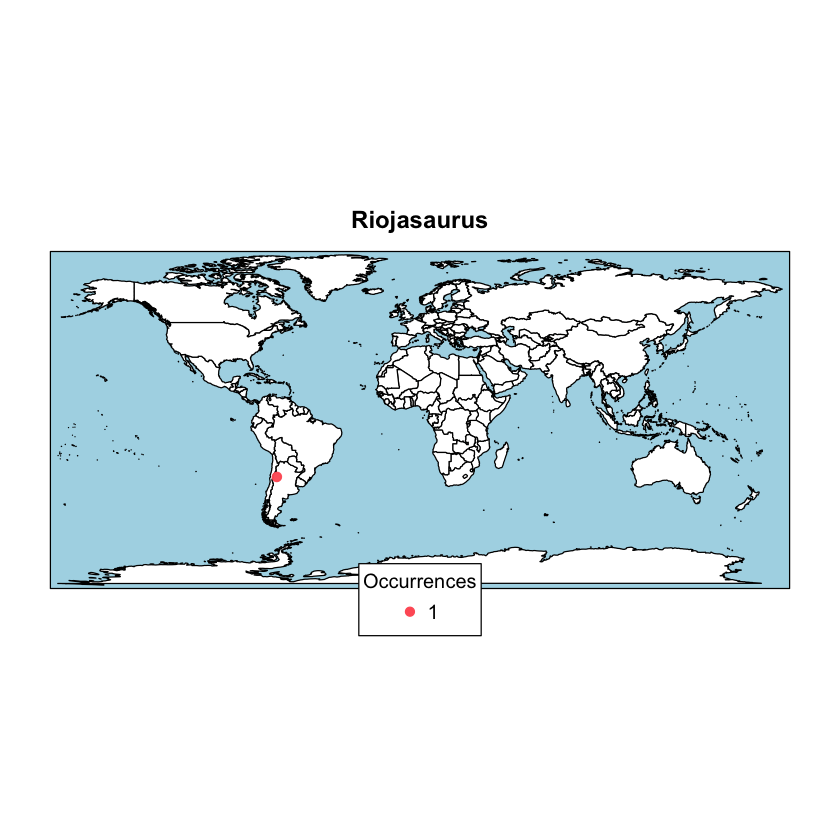

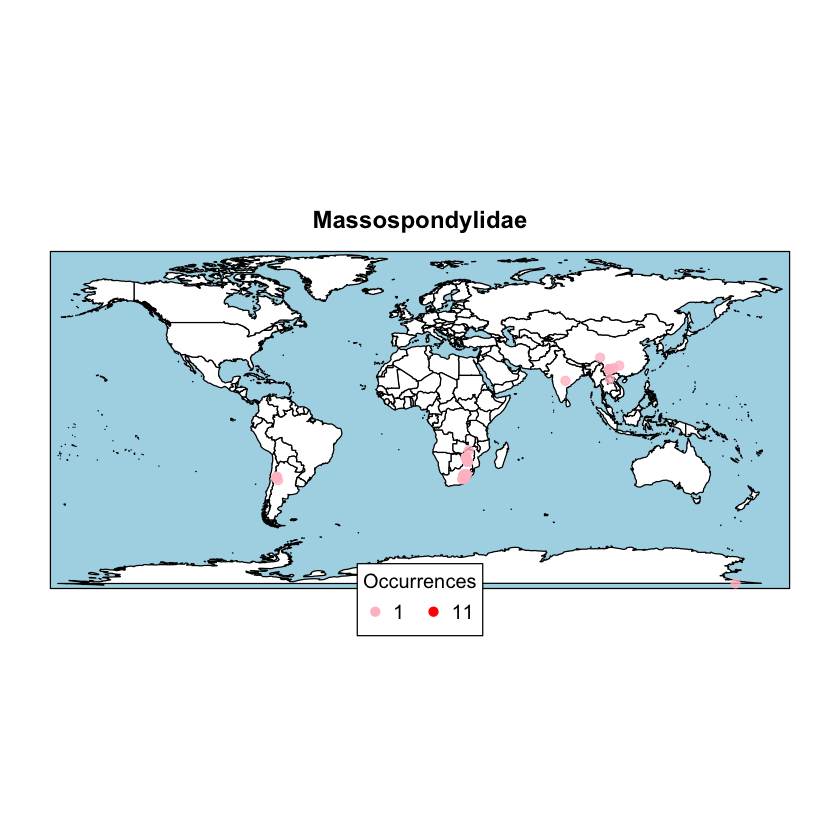

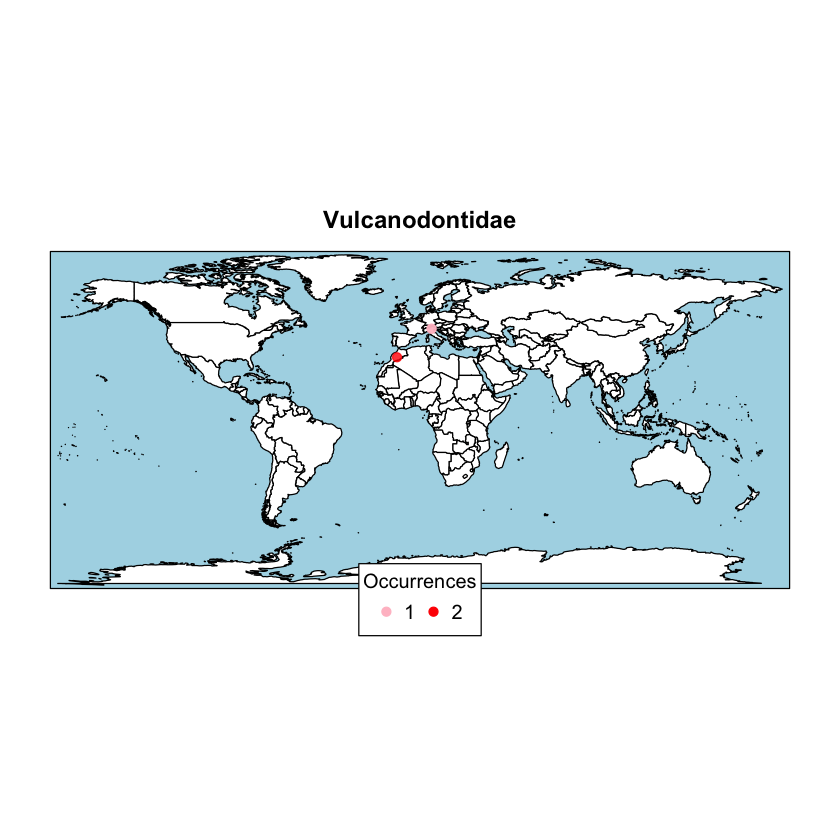

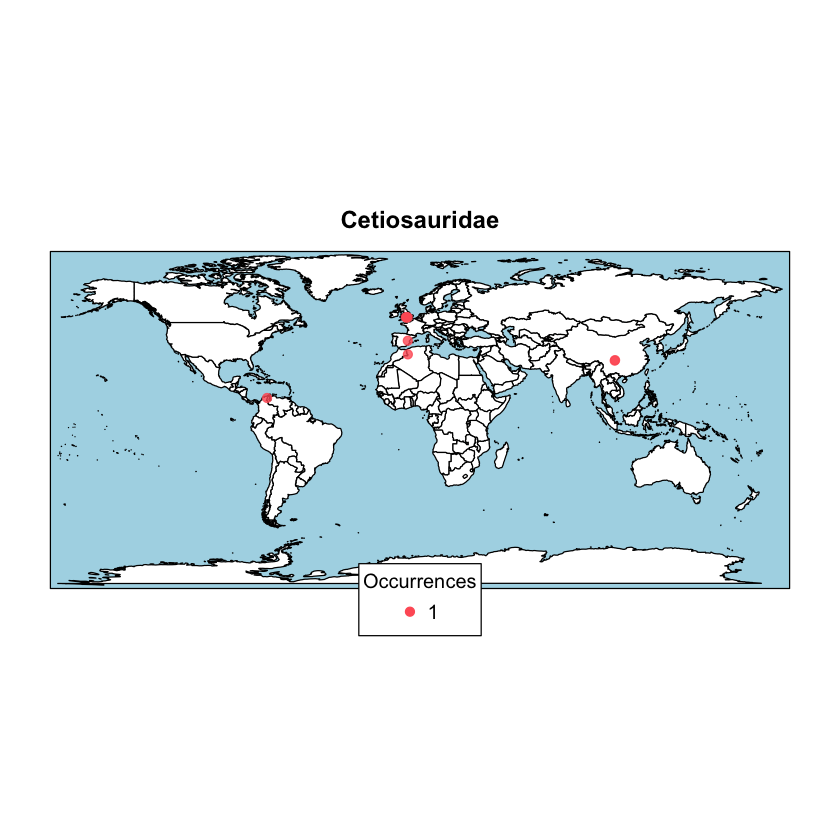

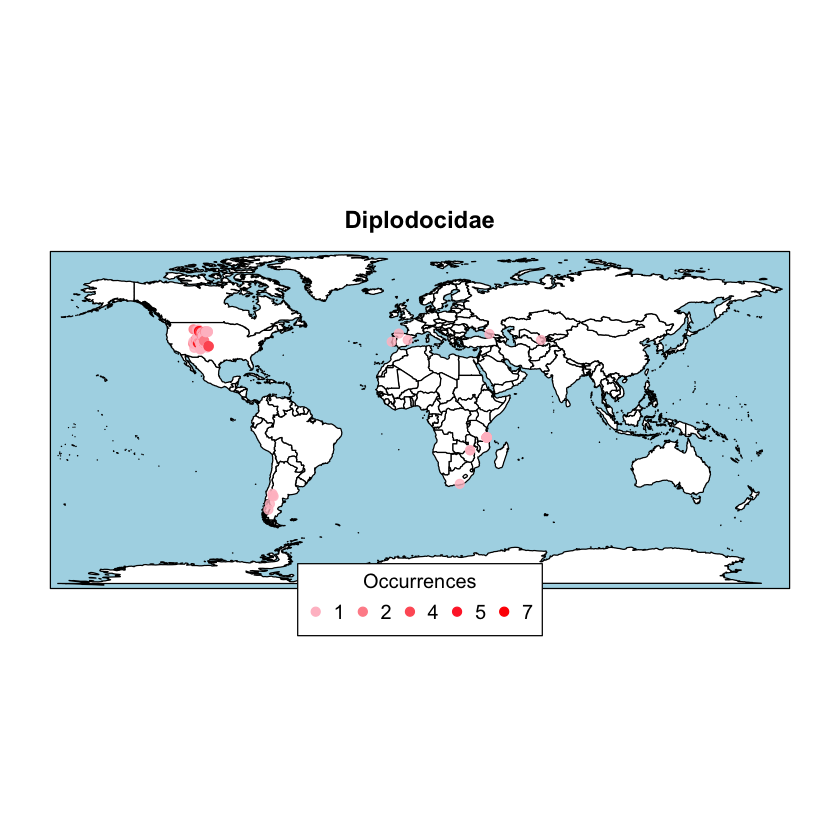

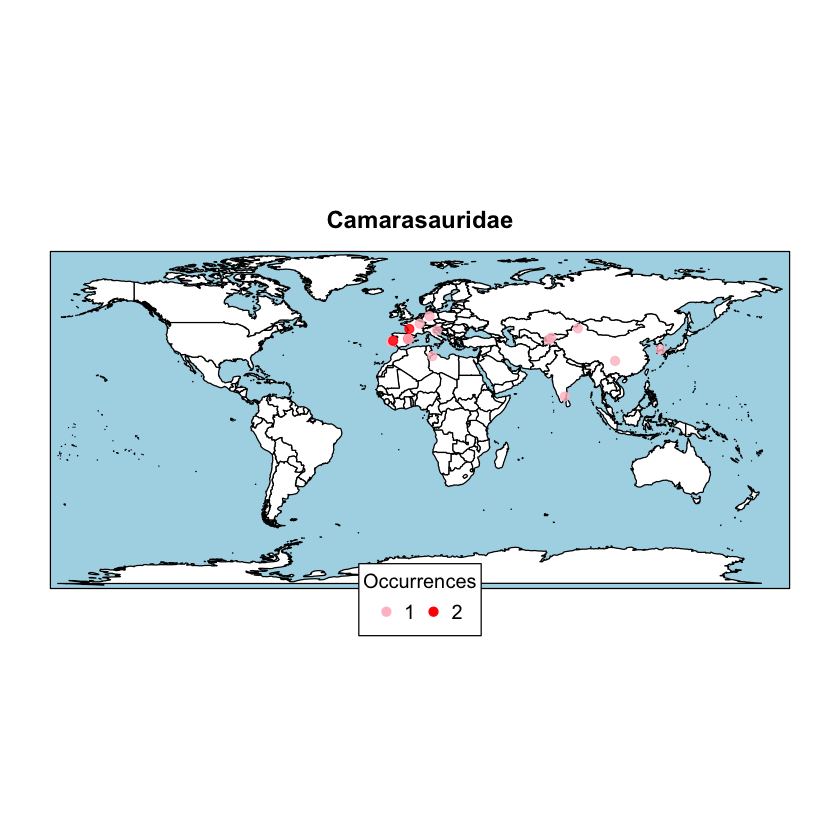

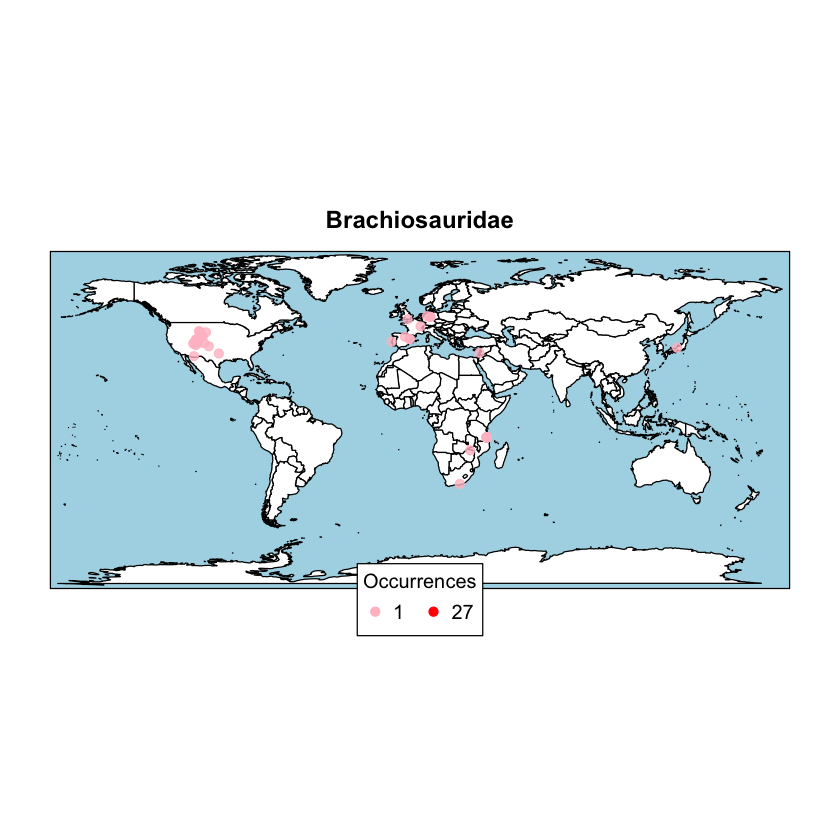

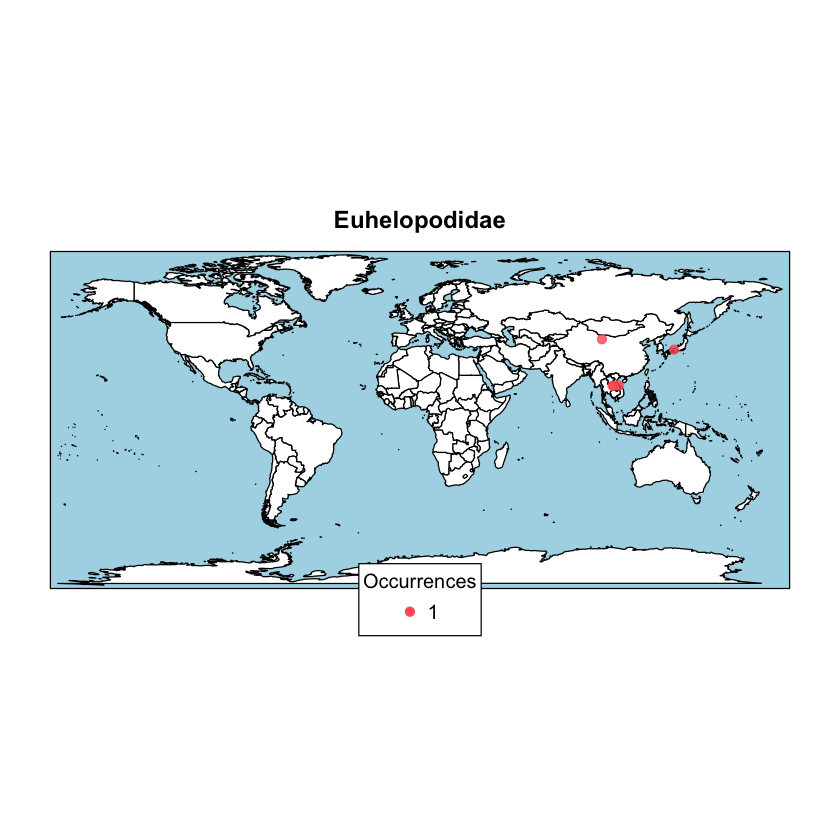

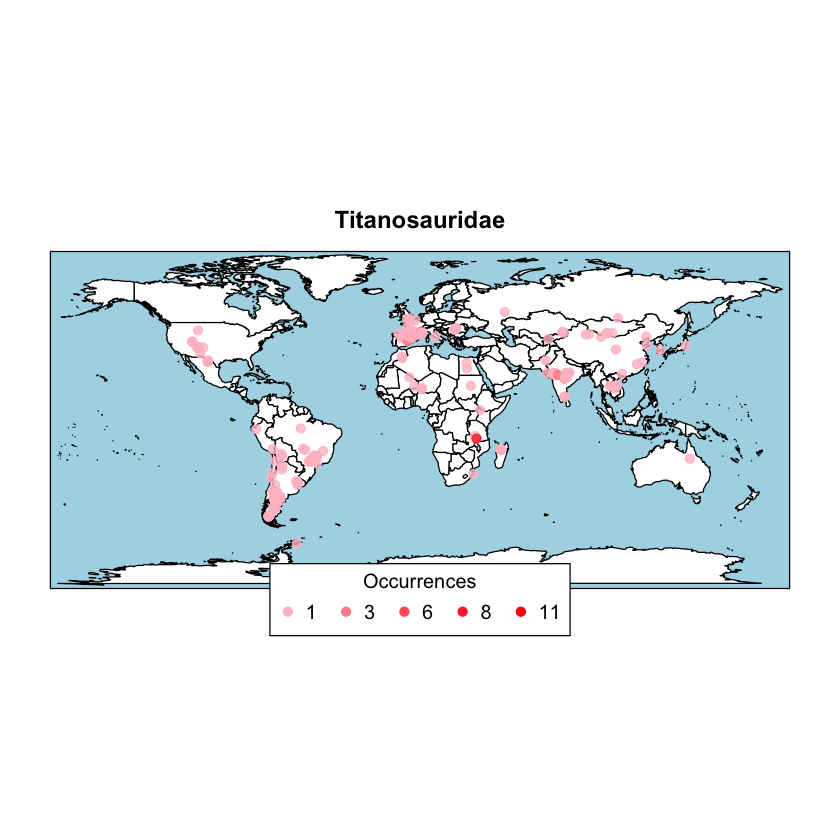

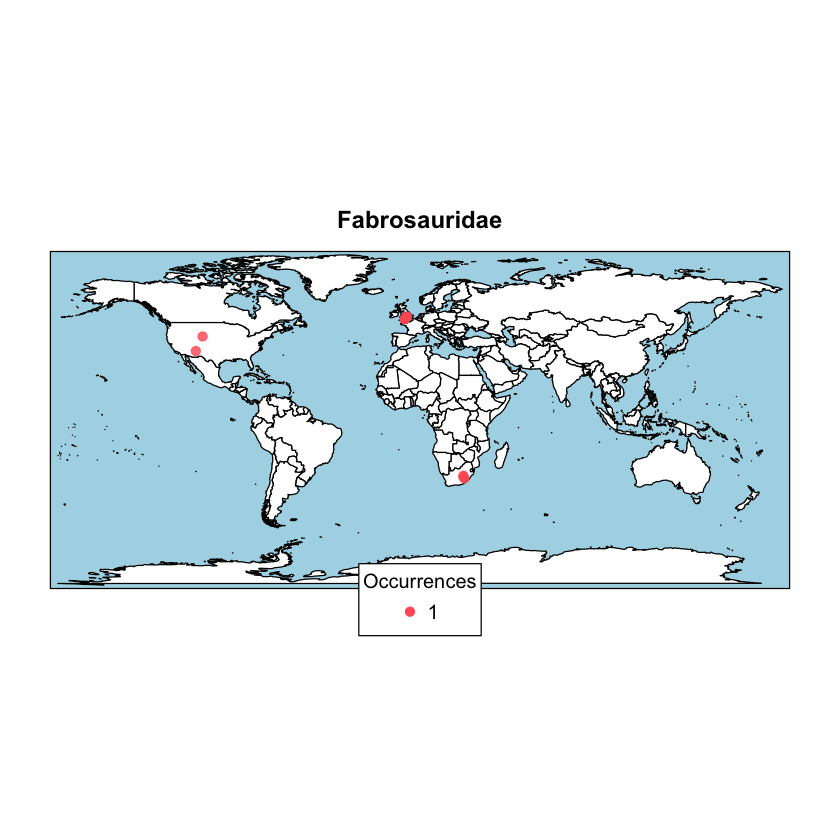

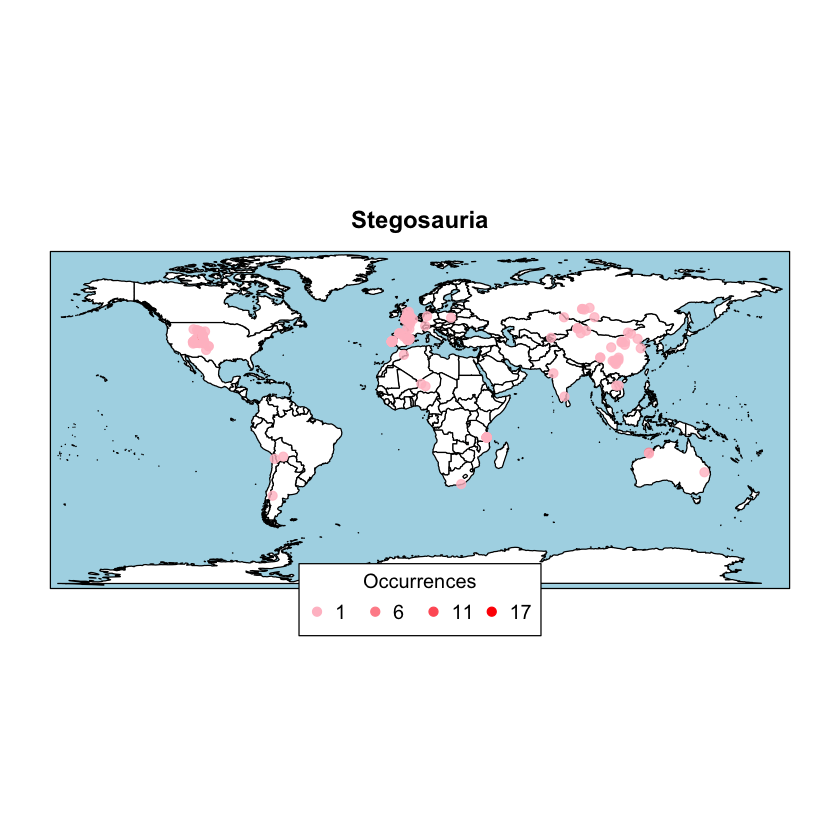

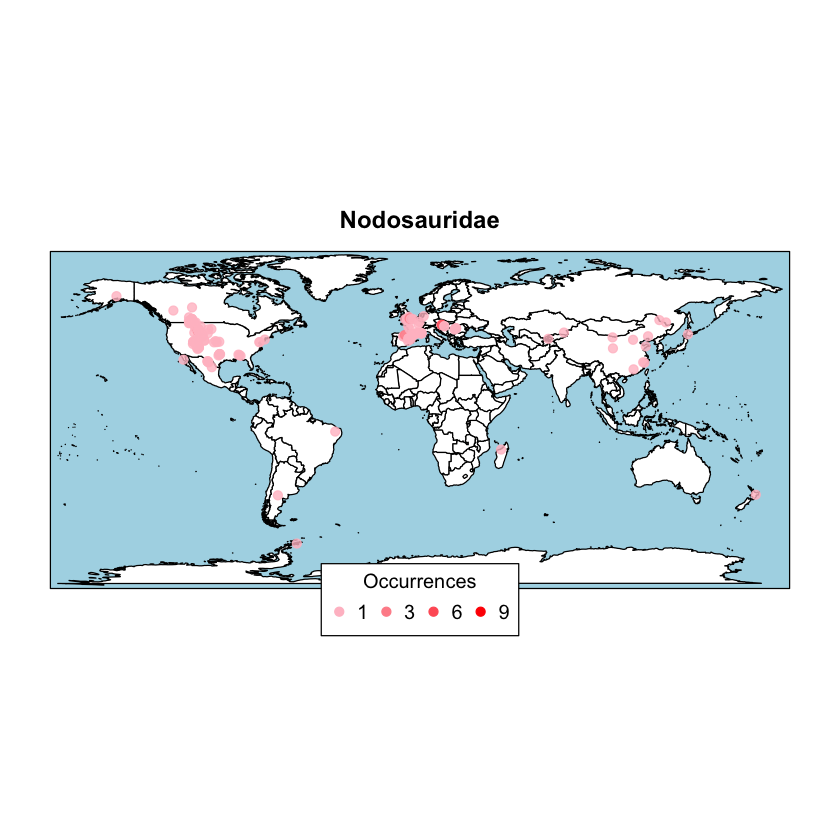

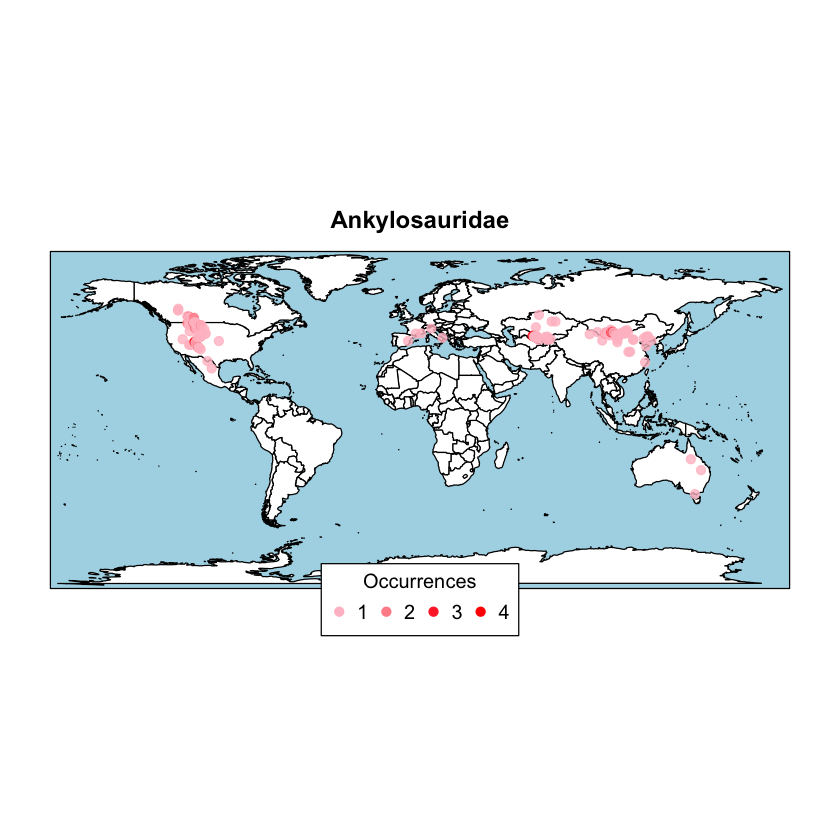

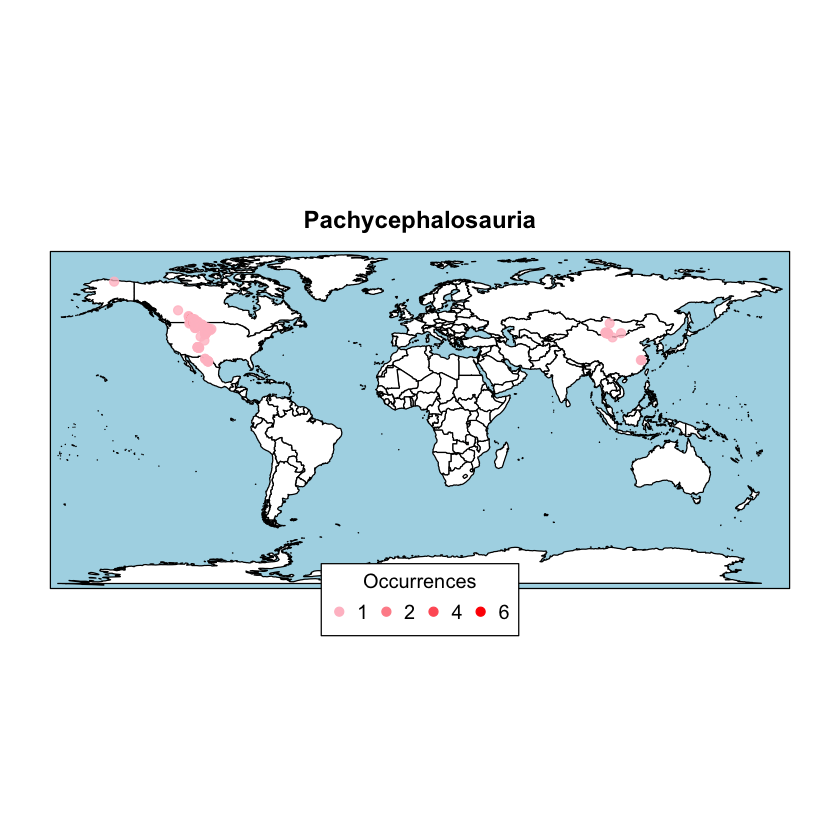

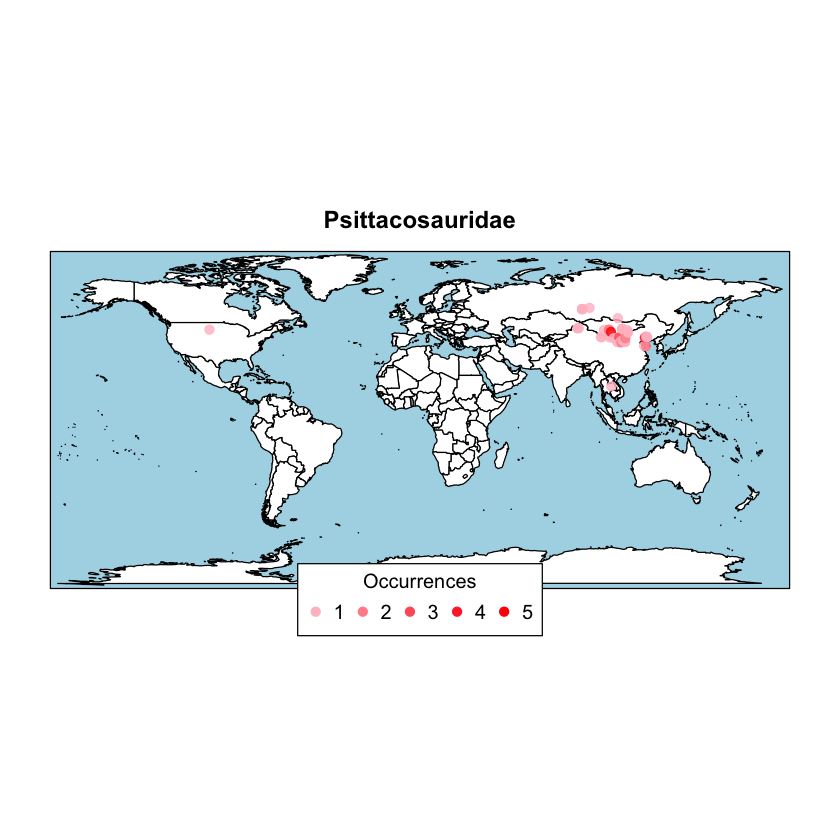

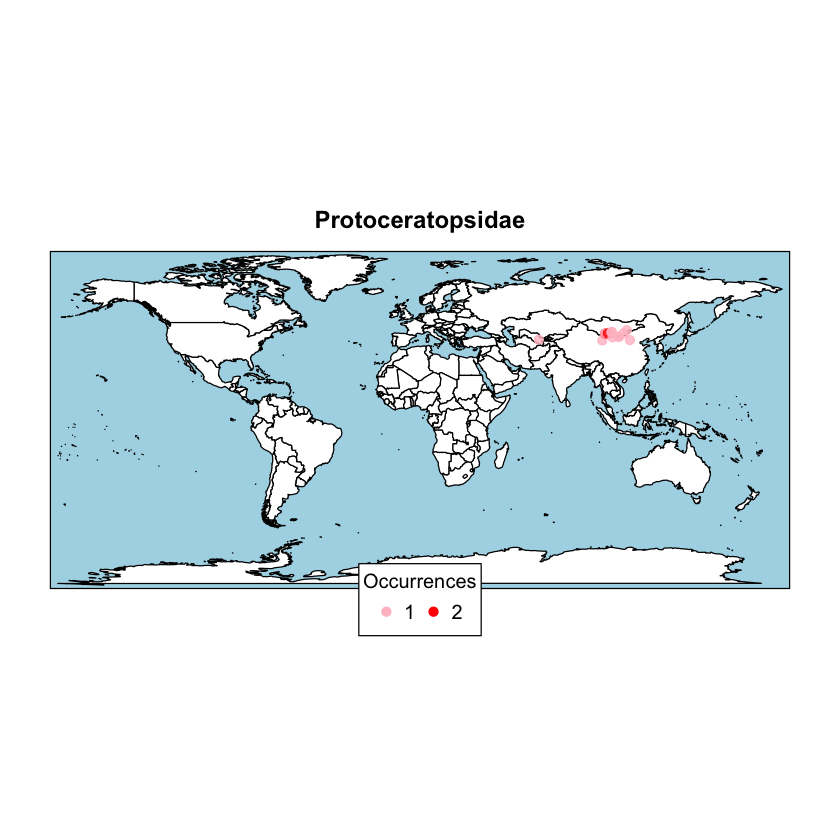

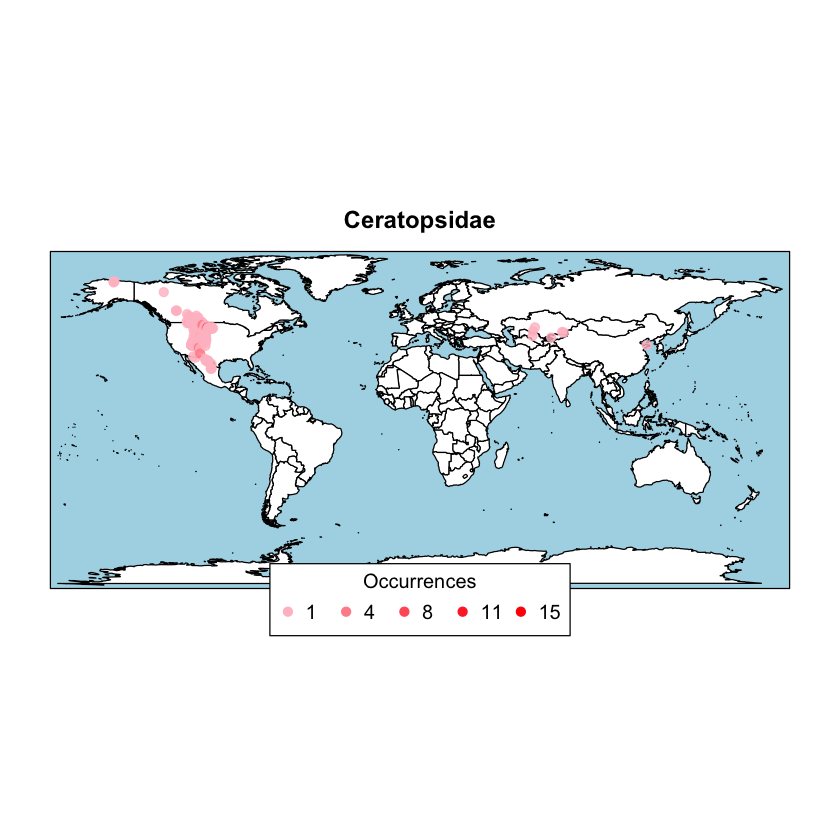

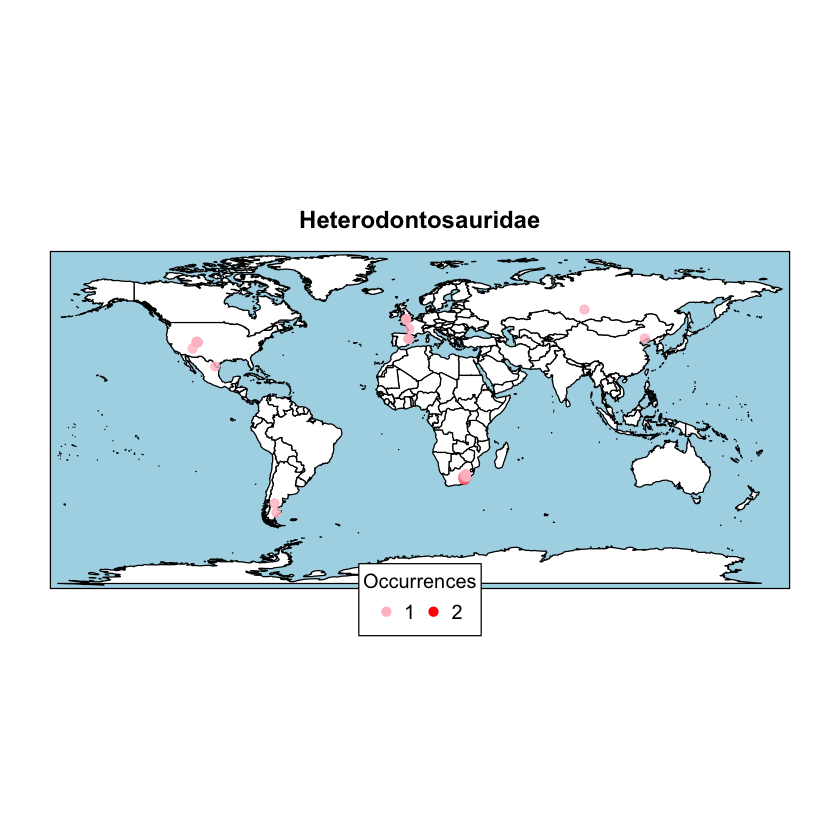

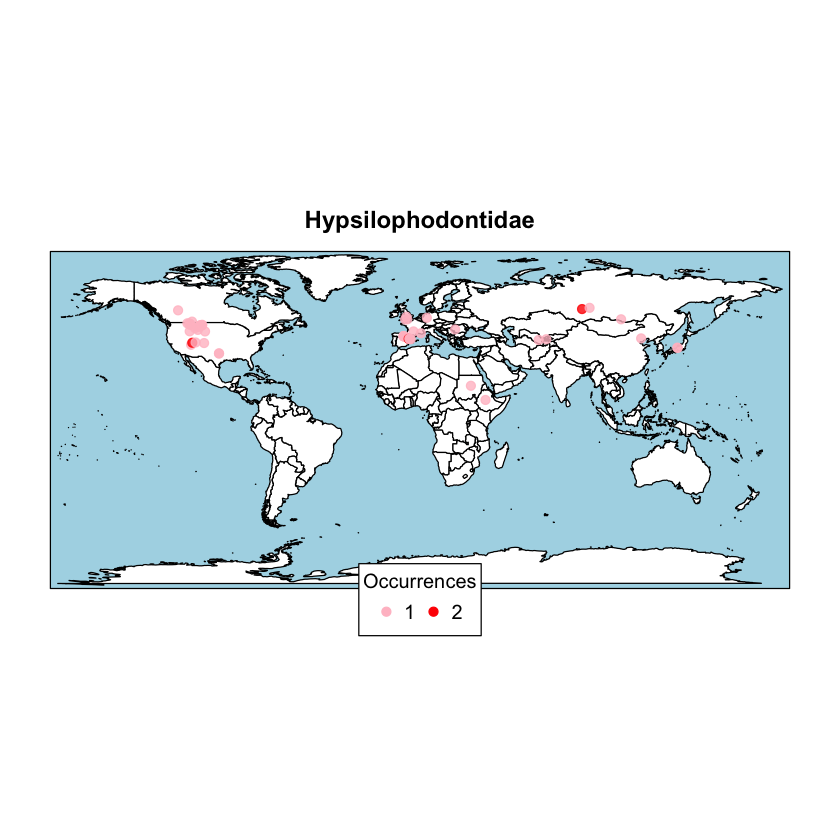

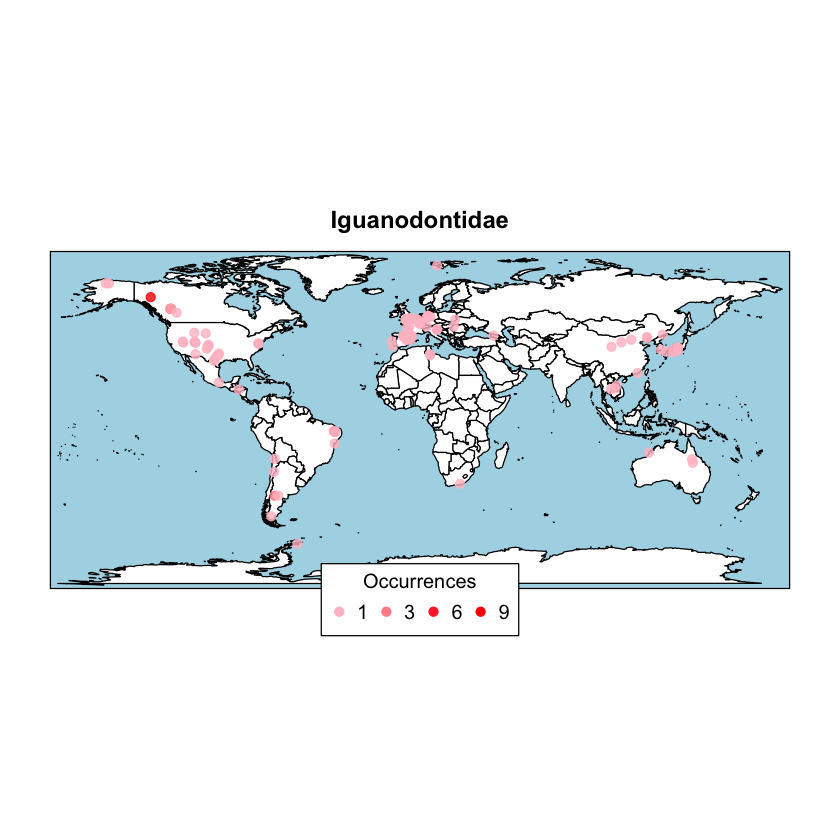

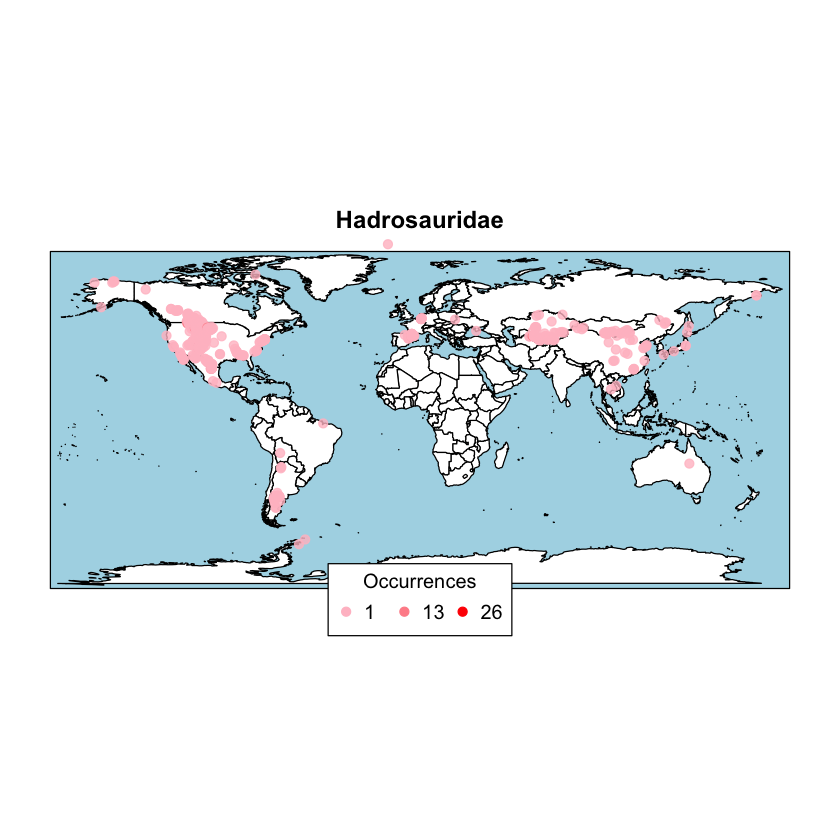

In [11]:
for(i in x){tryCatch(pbdb_map(
    pbdb_occurrences(limit="all",base_name=i, vocab="pbdb",show=c("coords", "phylo", "ident")),
    col.point=c("pink","red"), col.ocean="light blue",main = i),error=function(e){})}


Then call the pbdb_occurrences with the base_name as x so that we can get all the Dinasours occurence data under one variable name as try.

In [12]:
try <- pbdb_occurrences(limit="all",base_name=x, vocab="pbdb",show=c("coords", "phylo", "ident"))

In [13]:
#pbdb_map (try)

In [14]:
#try

Store the dinasour occurences data locally in a csv form.

In [15]:
write.csv(try, 'dinasourdata.csv')

According to our try and the visualiztions before, I decide to choose Dromaeosauridae and Tyrannosauridae because they are widely spread and have similar patterns from the North America to Russia and Mongolia. 

Dromaeosauridae is a family of feathered theropod dinosaurs. Wikipedia link https://en.wikipedia.org/wiki/Dromaeosauridae and one introduction from Berkeley http://www.ucmp.berkeley.edu/diapsids/saurischia/dromaeosauridae.html.

![image](../image/velociraptor1_skrep.jpg)

Image from http://www.ucmp.berkeley.edu/diapsids/saurischia/dromaeosauridae.html

Tyrannosauridae (or tyrannosaurids, meaning "tyrant lizards") is a family of coelurosaurian theropod dinosaurs that comprises two subfamilies containing up to thirteen genera, including the eponymous Tyrannosaurus. WikiPedia Link https://en.wikipedia.org/wiki/Tyrannosauridae Also an introduction note from UCBerkeley http://www.ucmp.berkeley.edu/diapsids/saurischia/tyrannosauridae.html
![image](../image/rex_fullview.jpg)
Image from http://www.ucmp.berkeley.edu/diapsids/saurischia/tyrannosauridae.html

For convience, get those two types' occurences from PBDB and save them locally.

In [16]:
Dromaeosauridae = pbdb_occurrences(
    limit="all",base_name='Dromaeosauridae', vocab="pbdb",show=c("coords", "phylo", "ident"))
Tyrannosauridae = pbdb_occurrences(
    limit="all",base_name='Tyrannosauridae', vocab="pbdb",show=c("coords", "phylo", "ident"))

write.csv(Dromaeosauridae, 'Dromaeosauridae.csv')

write.csv(Tyrannosauridae, 'Tyrannosauridae.csv')

Visualzie the Dromaeosauridae's occurence data.

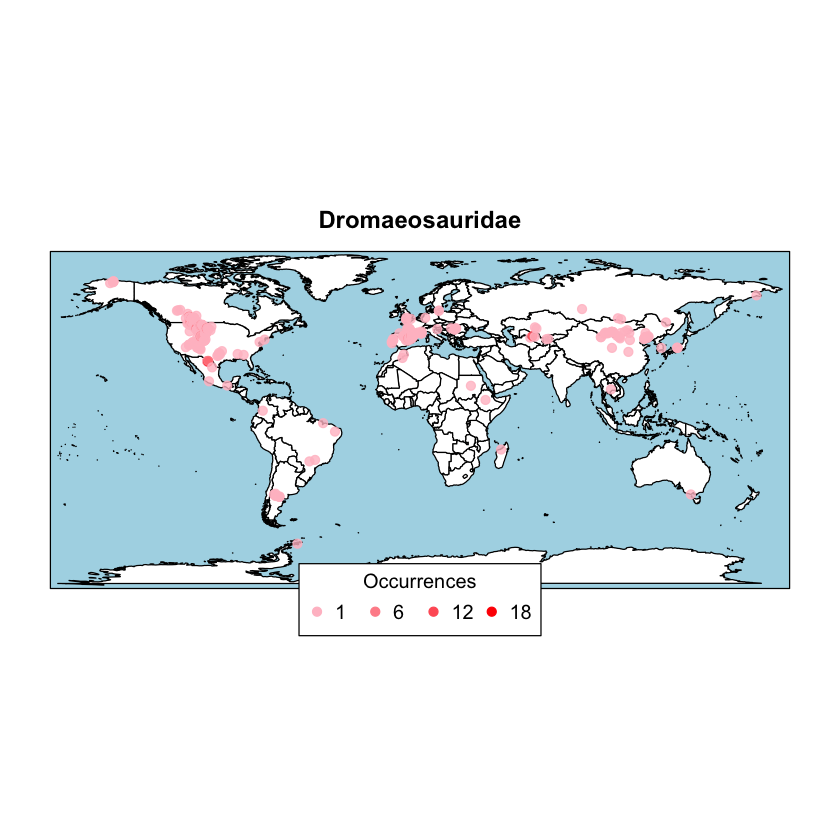

In [17]:
pbdb_map(Dromaeosauridae,col.point=c("pink","red"), col.ocean="light blue", main='Dromaeosauridae')

Visualzie the Tyrannosauridae's occurence data.

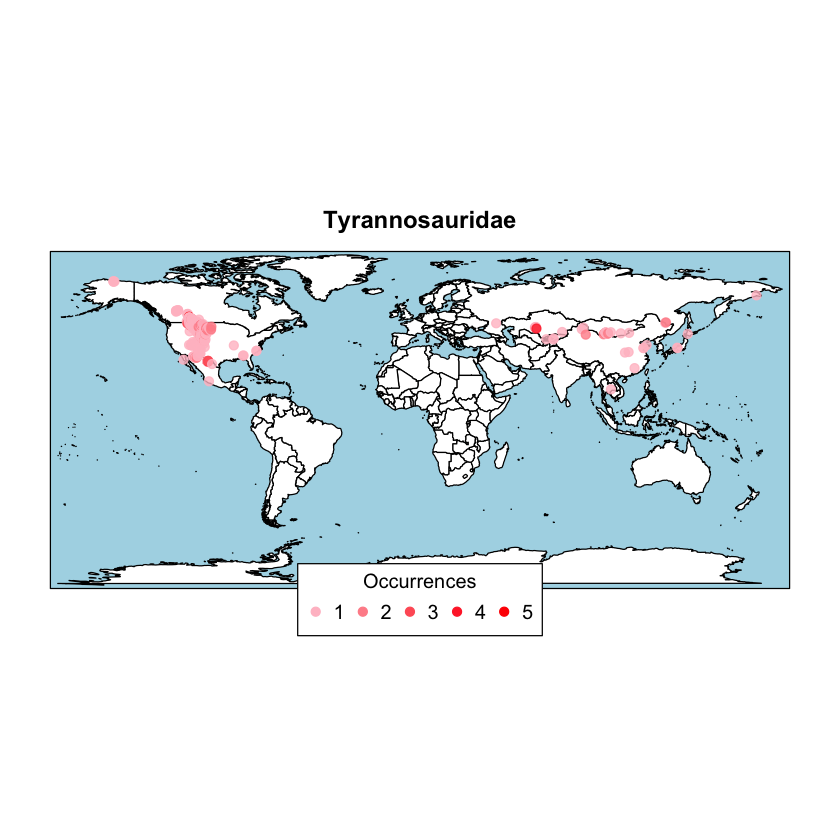

In [18]:
pbdb_map(Tyrannosauridae,col.point=c("pink","red"), col.ocean="light blue", main='Tyrannosauridae')

After doing this data retrieving, we are going to python notebook and pbdb site to find out their occurence timeline so the migration routine can be known. 

This is an interesting intereactive earth and its continent changes druing geological time. https://www.smithsonianmag.com/science-nature/travel-through-deep-time-interactive-earth-180952886/
![image](../image/earth.jpg)
This is how earth looks like during Jurassic time, which is the closet time we can find when our two dinasour familes are most active.

![image](../image/136145-050-0AC28C9A.jpg)
This is how earth looks like in the late Jurrasic.

![image](../image/136144-050-200CA3A5.jpg)
This is how earth looks like in the Crtecaous.
These two images are from https://www.britannica.com/science/

![image](../image/D1.jpg)
![image](../image/D2.jpg)
On pbdb's website, we can find that Dromaeosauridae are originated in North America and South Europe during J. Then they are wide spread to Russia and Asia During C.

![image](../image/T1.jpg)
![image](../image/T2.jpg)
On pbdb's website, we can find that Tyrannosauridae are originated in North America and Middle Asia during late C. Then they are wide spread to Russia,Asia and America in later times.

See the done meaning we are done with running all the cells and no errors occured. Congratulations on me!

In [19]:
print('Done!')

[1] "Done!"
